<a href="https://colab.research.google.com/github/Danalmestadi/T5-weekFour/blob/main/Clustering_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering and Dimensionality Reduction Exam
Welcome to the weekly project on clustering and dimensionality reduction. You will be working with a dataset of traffic accidents.

## Dataset
The dataset that will be used in this task is `Traffic_Accidents.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
The dataset contains information about traffic accidents, including location, weather conditions, road conditions, and more. Below are sample of these columns:

* `Location_Easting_OSGR`: Easting coordinate of the accident location.
* `Location_Northing_OSGR`: Northing coordinate of the accident location.
* `Longitude`: Longitude of the accident site.
* `Latitude`: Latitude of the accident site.
* `Police_Force`: Identifier for the police force involved.
* `Accident_Severity`: Severity of the accident.
* `Number_of_Vehicles`: Number of vehicles involved in the accident.
* `Number_of_Casualties`: Number of casualties in the accident.
* `Date`: Date of the accident.
* `Day_of_Week`: Day of the week when the accident occurred.
* `Speed_limit`: Speed limit in the area where the accident occurred.
* `Weather_Conditions`: Weather conditions at the time of the accident.
* `Road_Surface_Conditions`: Condition of the road surface during the accident.
* `Urban_or_Rural_Area`: Whether the accident occurred in an urban or rural area.
* `Year`: Year when the accident was recorded.
* Additional attributes related to road type, pedestrian crossing, light conditions, etc.

## Goal
The primary goal is to analyze the accidents based on their geographical location.


## Import Libraries

In [243]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Load the Data

In [244]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [245]:
df=pd.read_csv('/content/drive/MyDrive/weeklyTask_3/Traffic_Accidents.csv')

## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [246]:
display(df)

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,560530.0,103950.0,0.277298,50.812789,47,3.0,1,1.0,27/11/2009,6,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Raining with high winds,Flood (Over 3cm of water),2.0,Yes,2009
1,508860.0,187170.0,-0.430574,51.572846,1,3.0,2,1.0,10/10/2010,1,...,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,Yes,2010
2,314460.0,169130.0,-3.231459,51.414661,62,3.0,2,1.0,14/09/2005,4,...,3,4055,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2005
3,341700.0,408330.0,-2.881800,53.568318,4,3.0,1,2.0,18/08/2007,7,...,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2007
4,386488.0,350090.0,-2.203020,53.047882,21,3.0,2,2.0,06/08/2013,3,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51995,475125.0,319380.0,-0.888006,52.766777,33,3.0,2,1.0,31/08/2012,6,...,6,6485,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2012
51996,456682.0,127058.0,-1.192915,51.040030,44,3.0,1,1.0,08/05/2013,4,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Dry,2.0,Yes,2013
51997,540510.0,152250.0,0.012032,51.252055,45,3.0,3,1.0,01/11/2011,3,...,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2011
51998,434720.0,334000.0,-1.485264,52.902301,30,3.0,2,2.0,22/07/2011,6,...,5,81,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2011


In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52000 entries, 0 to 51999
Data columns (total 26 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Location_Easting_OSGR                        52000 non-null  float64
 1   Location_Northing_OSGR                       52000 non-null  float64
 2   Longitude                                    52000 non-null  float64
 3   Latitude                                     52000 non-null  float64
 4   Police_Force                                 52000 non-null  int64  
 5   Accident_Severity                            51678 non-null  float64
 6   Number_of_Vehicles                           52000 non-null  int64  
 7   Number_of_Casualties                         50959 non-null  float64
 8   Date                                         52000 non-null  object 
 9   Day_of_Week                                  52000 non-null  int64  
 10

In [248]:
df.shape

(52000, 26)

In [249]:
df.describe().round(0)

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
count,52000.0,52000.0,52000.0,52000.0,52000.0,51678.0,52000.0,50959.0,52000.0,52000.0,52000.0,52000.0,52000.0,52000.0,52000.0,51912.0,52000.0
mean,440284.0,299862.0,-1.0,53.0,30.0,3.0,2.0,1.0,4.0,350.0,4.0,997.0,39.0,3.0,385.0,1.0,2009.0
std,95110.0,161362.0,1.0,1.0,26.0,0.0,1.0,1.0,2.0,260.0,1.0,1806.0,14.0,3.0,1305.0,0.0,3.0
min,98480.0,19030.0,-7.0,50.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,15.0,-1.0,-1.0,1.0,2005.0
25%,375540.0,178010.0,-2.0,51.0,7.0,3.0,1.0,1.0,2.0,112.0,3.0,0.0,30.0,-1.0,0.0,1.0,2006.0
50%,440950.0,267180.0,-1.0,52.0,30.0,3.0,2.0,1.0,4.0,323.0,4.0,128.0,30.0,3.0,0.0,1.0,2010.0
75%,523500.0,398149.0,-0.0,53.0,46.0,3.0,2.0,1.0,6.0,530.0,6.0,716.0,50.0,6.0,0.0,2.0,2012.0
max,654960.0,1203900.0,2.0,61.0,98.0,3.0,34.0,51.0,7.0,941.0,6.0,9999.0,70.0,6.0,9999.0,3.0,2014.0


In [250]:
df.isnull().sum()

,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,322
Number_of_Vehicles,0
Number_of_Casualties,1041
Date,0
Day_of_Week,0


In [251]:
df.columns

Index(['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'Latitude', 'Police_Force', 'Accident_Severity', 'Number_of_Vehicles',
       'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       '2nd_Road_Class', '2nd_Road_Number',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions', 'Urban_or_Rural_Area',
       'Did_Police_Officer_Attend_Scene_of_Accident', 'Year'],
      dtype='object')

In [252]:
df.duplicated().sum()

43

## Data Preprocessing
Do what you think you need such as:
* Remove the outliers
* Impute missing data
* Scale the data
* Reduce dimentions using PCA
* Implement One-Hot Encoding for nominal categorical variables.

In [253]:
df[['Number_of_Vehicles']]=df[['Number_of_Vehicles']].astype('int64')

In [254]:
# removing the outliers
def remove_outliers(df , columns):
  for column in columns:
    q1=df[column].quantile(0.25)
    q3=df[column].quantile(0.75)
    iqr=q3-q1
    lower=q1-(1.5*iqr)
    upper=q3+(1.5*iqr)
    return df[(df[column]>=lower) & (df[column]<=upper)]
columns=['Number_of_Vehicles','Number_of_Casualties']
df=remove_outliers(df,columns)

In [255]:
#Impute missing data
df['Accident_Severity'].fillna(df['Accident_Severity'].mean(),inplace=True)
df['Urban_or_Rural_Area'].fillna(df['Urban_or_Rural_Area'].mean(),inplace=True)
df['Number_of_Casualties'].fillna(df['Number_of_Casualties'].mean(),inplace=True)
df['Light_Conditions'].fillna(df['Light_Conditions'].mode(),inplace=True)

<ipython-input-255-9e70d86cfc3b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Accident_Severity'].fillna(df['Accident_Severity'].mean(),inplace=True)
<ipython-input-255-9e70d86cfc3b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Urban_or_Rural_Area'].fillna(df['Urban_or_Rural_Area'].mean(),inplace=True)
<ipython-input-255-9e70d86cfc3b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Number_of_Casualties'].fillna(df[

In [256]:
display(df)

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,560530.0,103950.0,0.277298,50.812789,47,3.0,1,1.0,27/11/2009,6,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Raining with high winds,Flood (Over 3cm of water),2.0,Yes,2009
1,508860.0,187170.0,-0.430574,51.572846,1,3.0,2,1.0,10/10/2010,1,...,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,Yes,2010
2,314460.0,169130.0,-3.231459,51.414661,62,3.0,2,1.0,14/09/2005,4,...,3,4055,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2005
3,341700.0,408330.0,-2.881800,53.568318,4,3.0,1,2.0,18/08/2007,7,...,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2007
4,386488.0,350090.0,-2.203020,53.047882,21,3.0,2,2.0,06/08/2013,3,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51995,475125.0,319380.0,-0.888006,52.766777,33,3.0,2,1.0,31/08/2012,6,...,6,6485,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2012
51996,456682.0,127058.0,-1.192915,51.040030,44,3.0,1,1.0,08/05/2013,4,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Dry,2.0,Yes,2013
51997,540510.0,152250.0,0.012032,51.252055,45,3.0,3,1.0,01/11/2011,3,...,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2011
51998,434720.0,334000.0,-1.485264,52.902301,30,3.0,2,2.0,22/07/2011,6,...,5,81,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2011


In [257]:
#Scale the data
scaler=StandardScaler()
num_df=df.select_dtypes(exclude='object')
scaler.fit_transform(num_df)

array([[ 1.26345523, -1.21278881,  1.21818158, ..., -0.29588452,
         1.34753544, -0.13526591],
       [ 0.72034618, -0.69781848,  0.7120906 , ..., -0.29588452,
        -0.74321068,  0.19719874],
       [-1.32301361, -0.80945108, -1.29039378, ...,  2.8018737 ,
        -0.74321068, -1.46512453],
       ...,
       [ 1.05302281, -0.91390553,  1.02853044, ..., -0.29588452,
        -0.74321068,  0.5296634 ],
       [-0.05894752,  0.21077432, -0.04195687, ..., -0.23400575,
        -0.74321068,  0.5296634 ],
       [ 0.15116957, -0.70858571,  0.15333806, ..., -0.29588452,
         1.34753544,  0.19719874]])

In [258]:
#Reduce dimentions using PCA
pca=PCA(n_components=3)
pca.fit_transform(num_df)

array([[-2.24235891e+05, -5.07797581e+04, -8.41637567e+02],
       [-1.28819018e+05, -2.86214459e+04, -4.98116559e+02],
       [-8.33748774e+04,  1.61250630e+05, -1.89232032e+02],
       ...,
       [-1.72063241e+05, -4.73583116e+04, -8.17192376e+02],
       [ 3.40547353e+04, -5.64638963e+03, -9.81170553e+02],
       [-1.13050146e+05,  2.32112547e+04, -6.24973325e+02]])

In [259]:
#Implement One-Hot Encoding for nominal categorical variables.
def one_hot_encoding(df):
    for column in df.columns:
      if df[column].dtype==object:
        df=pd.get_dummies(df,columns=[column])
        return df
df=one_hot_encoding(df)

## Feature Selection
Select relevant features for clustering. Explain your choice of features.


In [260]:
#feature Selection
df=df[['Longitude','Latitude','Number_of_Vehicles','Number_of_Casualties']]
display(df)

,Longitude,Latitude,Number_of_Vehicles,Number_of_Casualties
0,0.277298,50.812789,1,1.0
1,-0.430574,51.572846,2,1.0
2,-3.231459,51.414661,2,1.0
3,-2.881800,53.568318,1,2.0
4,-2.203020,53.047882,2,2.0
...,...,...,...,...
51995,-0.888006,52.766777,2,1.0
51996,-1.192915,51.040030,1,1.0
51997,0.012032,51.252055,3,1.0
51998,-1.485264,52.902301,2,2.0


## Data Visualization
Visualize the data using appropriate plots to gain insights into the dataset. Using the following:
- Scatter plot of accidents based on Longitude and Latitude.

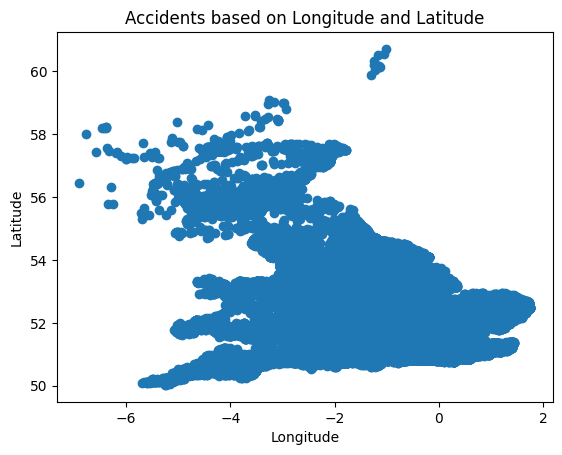

In [261]:
plt.scatter(df['Longitude'],df['Latitude'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Accidents based on Longitude and Latitude')
plt.show()

## Clustering
Apply K-Means clustering. Determine the optimal number of clusters and justify your choice.
* Find the `n_clusters` parameter using the elbow method.
* Train the model.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

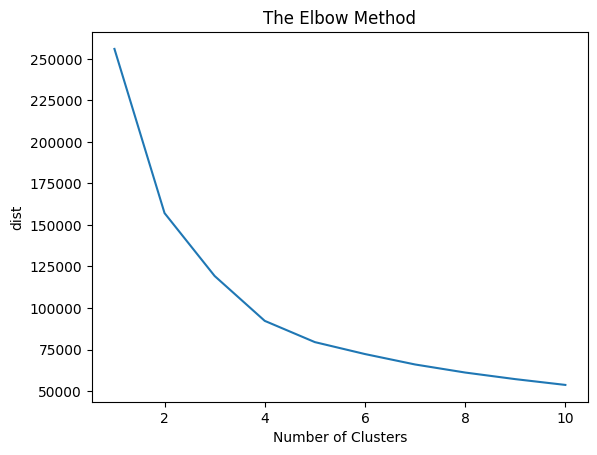

In [271]:
#elbow method
dist=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,random_state=0)
  kmeans.fit(df)
  dist.append(kmeans.inertia_)
plt.plot(range(1,11),dist)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('dist')
plt.show()

In [262]:
#Clustering
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(df)

## Evaluation
Evaluate the clustering result using appropriate metrics.


In [263]:
print(silhouette_score(df,kmeans.labels_))

0.3470568491140608


## Plot the data points with their predicted cluster center

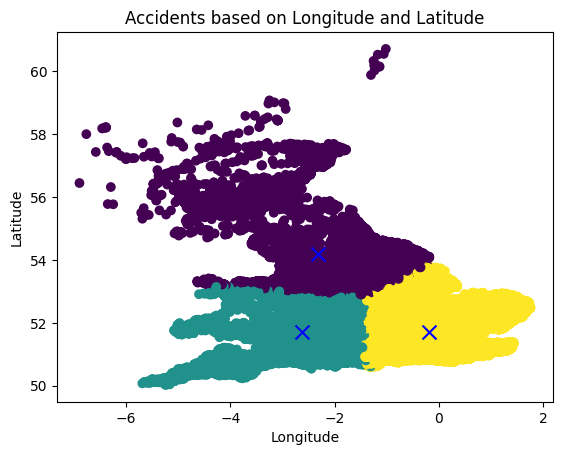

In [264]:
plt.scatter(df['Longitude'],df['Latitude'],c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,marker="x",c='blue')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Accidents based on Longitude and Latitude')
plt.show()

## Exam Questions
* **Justify Your Feature Selection:**
   - Which features did you choose for clustering and why?

I have selected the `'Longitude','Latitude','Number_of_Vehicles','Number_of_Casualties'`
In order to see where the most accidents happens

* **Number of Clusters Choices:**
   - How did you determine the optimal number?

using elbow mehtod and plot diagram

* **Evaluation:**
   - Which metrics did you use to evaluate the clustering results, and why?
   - How do these metrics help in understanding the effectiveness of your clustering approach?

I have chose silhouette the best value is 1 and the worst value is -1.
Values near 0 indicate overlapping clusters

* **Improvements and Recommendations:**
   - Suggest any improvements or future work that could be done with this dataset. What other methods or algorithms would you consider applying?

maybe I will use DBSCAN in order to see the density of where acciednt happens